In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
import tensorflow as tf
import tensorflow_quantum as tfq
from hep_VQAE import data_preprocessing as dp
from hep_VQAE import CAE as cae
import h5py

2022-08-24 16:12:32.771355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-24 16:12:32.771378: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/tom/.conda/envs/tfq/lib/python3.9/site-packages/cirq/ops/gateset.py:376: UserWarning: v0.14.1 is the last release `cirq.GlobalPhaseGate` is included by default. If you were relying on this behavior, you can include a `cirq.GlobalPhaseGate` in your `*gates`. If not, then you can ignore this warning. It will be removed in v0.16
  warnings.warn(
2022-08-24 16:12:34.217340: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-24 16:12:34.217364: W tensorflow/

In [2]:
f = h5py.File("../../data/quark-gluon/quark-gluon_train-set_n793900.hdf5","r")
f2 = h5py.File("../../data/quark-gluon/quark-gluon_test-set_n10000.hdf5","r")
#f3 = h5py.File("data/quark-gluon/quark-gluon_test-set_n139306.hdf5","r")

In [24]:
x_train = f.get('X_jets')

In [25]:
y_train = f.get('y')

In [3]:
f.keys()

<KeysViewHDF5 ['X_jets', 'm0', 'pt', 'y']>

In [26]:
x_train.shape

(793900, 125, 125, 3)

In [27]:
793900 // 2300

345

In [28]:
import keras
import numpy as np
from tensorflow.keras.utils import Sequence

In [29]:
class Generator(Sequence) :
  
  def __init__(self, hdf5_file, batch_size) :
    self.hdf5_file = hdf5_file
    self.batch_size = batch_size
    
  # Länge der Trainingsdaten (Anzahl der Batches)
  def __len__(self) :
    return x_train.shape[0]//self.batch_size
  
  # Lädt Bilder anhand der Pfade aus dem Trainingsarray
  def __getitem__(self, idx) :
    
    return self.hdf5_file[idx * self.batch_size: (idx + 1) * self.batch_size]/2222.665, self.hdf5_file[idx * self.batch_size: (idx + 1) * self.batch_size]/2222.665

In [30]:
traingen = Generator(x_train, 900)

In [31]:
model = cae.Convolutional_Autoencoder2(8)

In [32]:
model.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 42, 42, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 8)                 12808     
                                                                 
Total params: 37,336
Trainable params: 37,336
Non-traina

In [33]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=0.05))

/home/tom/.conda/envs/tfq/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
hist = model.fit_generator(traingen,epochs=2,shuffle=True)

/tmp/ipykernel_54851/565034597.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(traingen,epochs=2)


Epoch 1/2
882/882 [==============================] - 5743s 7s/step - loss: 6.3910e-04
Epoch 2/2
882/882 [==============================] - 5389s 6s/step - loss: 4.3068e-11


In [37]:
x_test = f2.get('X')
y_test = f2.get('y')

In [38]:
x_test.shape

(10000, 125, 125, 3)

In [39]:
def mae(x):
    pred = model.predict(x)
    return np.mean(np.abs(x - pred)**2,axis=(1,2,3))

def recon_acc(x):
    return 1 - mae(x)

In [40]:
x_test[:2000].shape

(2000, 125, 125, 3)

In [41]:
x_test[8000:10000].shape

(2000, 125, 125, 3)

In [42]:
zerrooo = recon_acc(x_test[:2000])
one = recon_acc(x_test[8000:10000])

In [43]:
zerrooo.shape

(2000,)

0.9999977
0.99999565


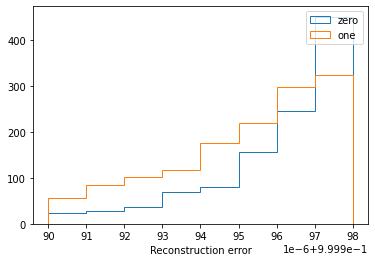

In [58]:
print(np.median(zerrooo))
bins = np.histogram(np.hstack((zerrooo, one)), bins=150)[1]
bins = np.arange(0.999990,0.999999,0.000001)
plt.hist(zerrooo, histtype='step', label="zero",bins=bins)#,bins=[0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.0011,0.0012,0.0013])
print(np.median(one))
plt.hist(one, histtype='step', label="one",bins=bins)#,bins=[0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.0011,0.0012,0.0013])
plt.xlabel("Reconstruction error")
plt.legend()

In [45]:
x_train.shape[0]

793900

In [46]:
batch_size = 1700

In [47]:
num_batches = x_train.shape[0]/batch_size

In [52]:
fsmall.close()

In [53]:
fsmall = h5py.File('../../data/compressed3.hdf5','w')
fsmall.create_dataset('X', shape=(x_train.shape[0],8))
fsmall.create_dataset('y', shape=(x_train.shape[0], 1))

for i in range(int(num_batches)):
    fsmall['X'][i * batch_size: (i + 1) * batch_size] = model.encoder(x_train[i * batch_size: (i + 1) * batch_size]/2222.665)
    fsmall['y'][i * batch_size: (i + 1) * batch_size] = y_train[i * batch_size: (i + 1) * batch_size].reshape((batch_size,1))
    print(i, end="\r")

NameError: name 'sixes' is not defined

In [21]:
maxx = 0
minn = 10000000

for i in range(int(num_batches)):
    cmax = np.max(x_train[i * batch_size: (i + 1) * batch_size])
    if cmax > maxx:
        maxx = cmax
    cmin = np.min(x_train[i * batch_size: (i + 1) * batch_size])
    if cmin < minn:
        minn = cmin
    print(i)
    
print(maxx)
print(minn)

2222.665
0.0


In [37]:
model.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1600)              11200     
                                                                 
 reshape (Reshape)           (None, 5, 5, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 15, 15, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 31, 31, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 62, 62, 16)       4624      
 ranspose)                                                       
                                                      

In [38]:
from tensorflow.keras import layers, losses

In [39]:
x = layers.Input(shape=(6,))

In [55]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## from tensorflow.keras.models import Model
newmodel = Model(inputs=x, outputs=model.decoder)